In [1]:
pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 35.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using

In [2]:
pip install table_evaluator

In [3]:
from sdv.datasets.demo import get_available_demos
get_available_demos(modality="single_table")

,dataset_name,size_MB,num_tables
0,KRK_v1,0.06,1
1,adult,3.91,1
2,alarm,4.52,1
3,asia,1.28,1
4,census,98.17,1
5,census_extended,4.95,1
6,child,3.20,1
7,covtype,255.65,1
8,credit,68.35,1
9,expedia_hotel_logs,0.20,1


In [4]:
from sdv.datasets.demo import download_demo
real_data,metadata=download_demo(
    modality='single_table',
    dataset_name='fake_companies'
)

In [5]:
metadata

{
    "columns": {
        "company": {
            "sdtype": "categorical"
        },
        "department": {
            "sdtype": "categorical"
        },
        "employee_id": {
            "sdtype": "numerical",
            "computer_representation": "Int64"
        },
        "age": {
            "sdtype": "numerical",
            "computer_representation": "Int64"
        },
        "age_when_joined": {
            "sdtype": "numerical",
            "computer_representation": "Int64"
        },
        "years_in_the_company": {
            "sdtype": "numerical",
            "computer_representation": "Int64"
        },
        "salary": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "annual_bonus": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "prior_years_experience": {
            "sdtype": "numerical",
            "computer_representation": "Int64"
        },
    

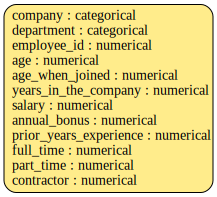

In [6]:
metadata.visualize()

In [7]:
metadata.validate()

In [9]:
from sdv.single_table import TVAESynthesizer
synthesizer=TVAESynthesizer(metadata)
synthesizer.fit(real_data)

In [10]:
synthetic_data = synthesizer.sample(num_rows=100)

In [11]:
synthetic_data

,company,department,employee_id,age,age_when_joined,years_in_the_company,salary,annual_bonus,prior_years_experience,full_time,part_time,contractor
0,Glasses,Support,14,40,22,3,71869.94,13540.15,3,0.0,0.0,0.0
1,Pear,Design,50,43,39,3,130118.52,18226.53,2,0.0,0.0,0.0
2,Pear,BigData,11,47,34,8,92449.43,18995.95,1,0.0,0.0,0.0
3,Pear,Sales,26,30,22,5,101092.27,18540.67,2,0.0,0.0,0.0
4,Glasses,AI,1,41,26,4,96097.59,20702.65,2,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Cheerper,Support,78,36,36,2,53116.48,13290.58,3,0.0,1.0,0.0
96,Pear,Sales,17,35,28,3,76036.48,20382.25,1,0.0,0.0,0.0
97,Cheerper,Support,20,30,26,5,61933.86,19432.74,2,0.0,0.0,0.0
98,Pear,Sales,41,46,36,5,90102.26,14206.00,1,1.0,0.0,0.0


In [12]:
synthetic_data.isnull().sum()

company                   0
department                0
employee_id               0
age                       0
age_when_joined           0
years_in_the_company      0
salary                    0
annual_bonus              0
prior_years_experience    0
full_time                 0
part_time                 0
contractor                0
dtype: int64

In [13]:
synthetic_data['company']

0      Glasses
1         Pear
2         Pear
3         Pear
4      Glasses
        ...   
95    Cheerper
96        Pear
97    Cheerper
98        Pear
99     Glasses
Name: company, Length: 100, dtype: object

In [14]:
synthesizer.save(
    filepath="my_TVAESynthesizer.pkl"
)

Thank You @Ayush Siloiya